Evaluating Logisitc Regression and Random Forest on Wildfire training and test data sets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# details for wildfires dataset
training_file = "wildfires_training.csv"
test_file = "wildfires_test.csv"
independent_cols = ["year", "temp", "humidity", "rainfall", "drought_code", "buildup_index", "day",
                    "month", "wind_speed"]
dependent_col = "fire"

# Here we load our training dataset in from the training file using the pandas library
df_training = pd.read_csv(training_file)
print(df_training.head())
print(df_training.shape)

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    28        59       0.0          8.06           3.47    1   
1   no  2010    30        61       1.3          8.17           4.03    2   
2   no  2009    26        83      13.1          8.08           3.59    3   
3   no  2017    25        87       2.5          7.18           2.42    4   
4   no  2014    28        77       0.0         14.98           4.63    5   

   month  wind_speed  
0      6          19  
1      6          13  
2      6          22  
3      6          15  
4      6          18  
(154, 10)


In [2]:
#We can also load our test data too
df_test = pd.read_csv(test_file)
print(df_test.head())
print(df_test.shape)

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    33        68       4.5          9.12           5.09   19   
1  yes  2009    28        56       0.0         38.17          21.21   12   
2   no  2017    30        64       0.6         15.38           6.24   24   
3   no  2007    23        74       8.3          7.36           2.27   14   
4   no  2017    31        72       0.3         30.47           5.63    7   

   month  wind_speed  
0      6          16  
1      6          18  
2      9          19  
3      9          28  
4      9          17  
(50, 10)


In [3]:
# create matrix X containing the independent variables and a vector y containing the dependent variable for the training data
X_training = df_training.loc[:,independent_cols]
y_training = df_training.loc[:,dependent_col]
print(X_training.head())
print(y_training.head())

   year  temp  humidity  rainfall  drought_code  buildup_index  day  month  \
0  2015    28        59       0.0          8.06           3.47    1      6   
1  2010    30        61       1.3          8.17           4.03    2      6   
2  2009    26        83      13.1          8.08           3.59    3      6   
3  2017    25        87       2.5          7.18           2.42    4      6   
4  2014    28        77       0.0         14.98           4.63    5      6   

   wind_speed  
0          19  
1          13  
2          22  
3          15  
4          18  
0    no
1    no
2    no
3    no
4    no
Name: fire, dtype: object


In [4]:
# create matrix X containing the independent variables and a vector y containing the dependent variable for the test data
X_test = df_test.loc[:,independent_cols]
y_test = df_test.loc[:,dependent_col]
print(X_test.head())
print(y_test.head())

   year  temp  humidity  rainfall  drought_code  buildup_index  day  month  \
0  2015    33        68       4.5          9.12           5.09   19      6   
1  2009    28        56       0.0         38.17          21.21   12      6   
2  2017    30        64       0.6         15.38           6.24   24      9   
3  2007    23        74       8.3          7.36           2.27   14      9   
4  2017    31        72       0.3         30.47           5.63    7      9   

   wind_speed  
0          16  
1          18  
2          19  
3          28  
4          17  
0     no
1    yes
2     no
3     no
4     no
Name: fire, dtype: object


Logistic Regression:
First we will evaluate Logistic Regression while tuning the hyperparameters C (regularisation strength) and the Solver.

Accuracy on training data: 0.9090909090909091
Accuracy on test data: 0.9


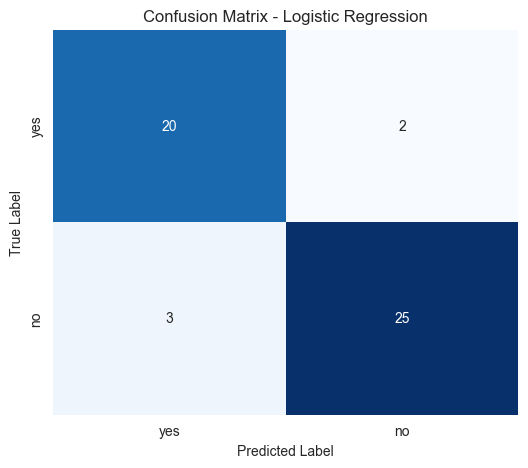

In [5]:
from sklearn import linear_model, metrics

#create a model using default settings and compute the predictions for the training and test sets
logisticRegression = linear_model.LogisticRegression(max_iter=1000)#had to increase max_iter from the default of 100 to avoid convergance errors
logisticRegression.fit(X_training, y_training)

predictions_training = logisticRegression.predict(X_training)
predictions_test= logisticRegression.predict(X_test)

accuracy_training = metrics.accuracy_score(y_training, predictions_training)
accuracy_test = metrics.accuracy_score(y_test, predictions_test)
print("Accuracy on training data:",accuracy_training)
print("Accuracy on test data:",accuracy_test)


#Compute a conufsion matrix and plot the test results

conf_matrix = metrics.confusion_matrix(y_test, predictions_test)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['yes','no'],yticklabels=['yes','no'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [6]:
#Testing the C (regularisation strength) hyperparameter
import numpy as np
C_values = np.logspace(-3, 3, 10)  # 10 values from 0.001 to 1000
training_accuracies = []
test_accuracies = []

for C in C_values:
    model_C = linear_model.LogisticRegression(C=C, max_iter=1000)
    model_C.fit(X_training, y_training)

    training_accuracies.append(metrics.accuracy_score(y_training, model_C.predict(X_training)))
    test_accuracies.append(metrics.accuracy_score(y_test, model_C.predict(X_test)))


results = pd.DataFrame({
    "C": C_values,
    "Training Accuracy": training_accuracies,
    "Test Accuracy": test_accuracies
})

print(results)



             C  Training Accuracy  Test Accuracy
0     0.001000           0.863636           0.82
1     0.004642           0.876623           0.82
2     0.021544           0.870130           0.82
3     0.100000           0.896104           0.82
4     0.464159           0.889610           0.86
5     2.154435           0.915584           0.90
6    10.000000           0.922078           0.88
7    46.415888           0.928571           0.86
8   215.443469           0.922078           0.86
9  1000.000000           0.922078           0.86


In [7]:
#Testing the Solver hyperparameter

solvers = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']

train_accuracies = []
test_accuracies = []

for solver in solvers:
    model_solver = linear_model.LogisticRegression(solver=solver, max_iter=1000)
    model_solver.fit(X_training, y_training)

    train_acc = metrics.accuracy_score(y_training, model_solver.predict(X_training))
    test_acc = metrics.accuracy_score(y_test, model_solver.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

results = pd.DataFrame({
    "Solver": solvers,
    "Training Accuracy": train_accuracies,
    "Test Accuracy": test_accuracies
})

print(results)


      Solver  Training Accuracy  Test Accuracy
0  liblinear           0.909091           0.90
1      lbfgs           0.909091           0.90
2  newton-cg           0.902597           0.90
3        sag           0.870130           0.82
4       saga           0.870130           0.82


C:\Users\macao\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\macao\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [8]:
#evaluating all the combinations of solvers and C values
results = []

for solver in solvers:
    for C in C_values:
        model = linear_model.LogisticRegression(C=C, solver=solver, max_iter=1000)
        model.fit(X_training, y_training)

        train_acc = metrics.accuracy_score(y_training, model.predict(X_training))
        test_acc = metrics.accuracy_score(y_test, model.predict(X_test))

        results.append({
            "Solver": solver,
            "C": C,
            "Training Accuracy": train_acc,
            "Test Accuracy": test_acc
        })

results_df = pd.DataFrame(results)
print(results_df)

C:\Users\macao\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\macao\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\macao\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\macao\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\macao\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the 

       Solver            C  Train Accuracy  Test Accuracy
0   liblinear     0.001000        0.863636           0.82
1   liblinear     0.004642        0.876623           0.82
2   liblinear     0.021544        0.870130           0.82
3   liblinear     0.100000        0.896104           0.82
4   liblinear     0.464159        0.889610           0.86
5   liblinear     2.154435        0.915584           0.90
6   liblinear    10.000000        0.922078           0.88
7   liblinear    46.415888        0.928571           0.86
8   liblinear   215.443469        0.922078           0.86
9   liblinear  1000.000000        0.922078           0.86
10      lbfgs     0.001000        0.863636           0.82
11      lbfgs     0.004642        0.876623           0.82
12      lbfgs     0.021544        0.870130           0.82
13      lbfgs     0.100000        0.896104           0.82
14      lbfgs     0.464159        0.889610           0.86
15      lbfgs     2.154435        0.915584           0.90
16      lbfgs 

C:\Users\macao\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\macao\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\macao\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Random Forest: tuning hyperparameters n_estimat